## Assignment 2 - Ailerons data set (using ailerons.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ailerons_train.csv")
df.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [3]:
df.shape

(12250, 41)

In [4]:
df.isnull().sum()

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

In [7]:
df

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.000,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,448,39,0.21,0.05,0.14,-0.5,-8,-4,0.009,-0.1,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.5,0.019,-0.0007
12246,179,64,0.06,0.17,0.41,0.5,-8,-9,-0.010,-0.6,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6,0.021,-0.0008
12247,65,66,-0.03,0.14,0.54,0.5,-7,-17,-0.010,0.4,...,0.0,0.001,0.0,0.0,0.0,0.000,0.0,0.6,0.021,-0.0007
12248,-22,66,-0.08,0.23,0.61,0.5,-8,-15,-0.010,-0.6,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6,0.022,-0.0006


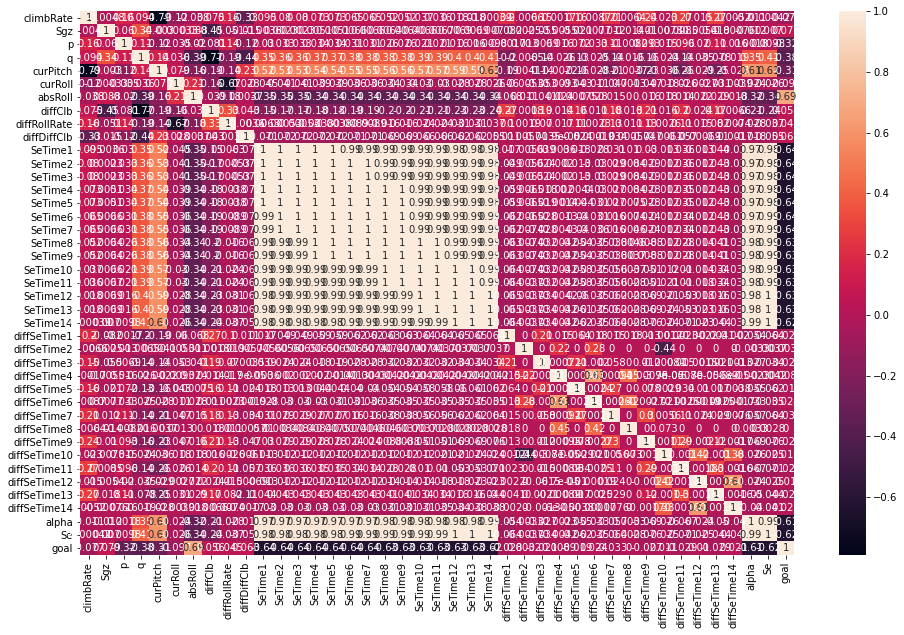

In [9]:
correlation = df.corr() 
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(correlation ,annot = True)

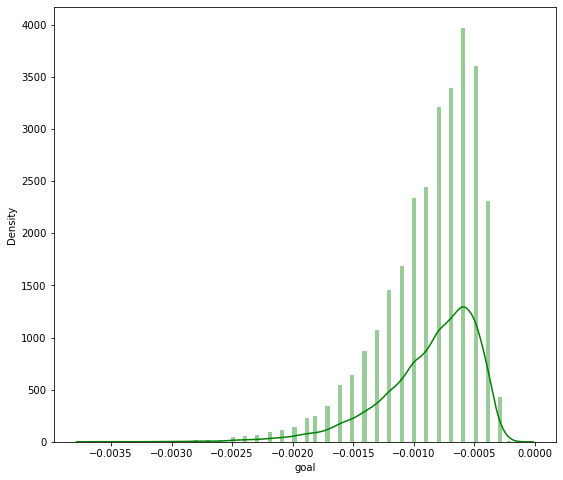

In [12]:
plt.figure(figsize=(9, 8))
sns.distplot(df['goal'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [13]:
X=df.iloc[:,[0,1,2,3,4,6]].values
Y=df.iloc[:,5].values

In [14]:
Y

array([ 0.2, -0.6,  0.4, ...,  0.5,  0.5, -0.7])

In [15]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Apply various regression models and find out which model is the best for this dataset
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set results
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(" rmse value of Linear Regression is : ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


#Decision Tree Classifies
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(" rmse value of Decision tree Regression is : ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(" rmse value of Random forest Regression is : ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

 rmse value of Linear Regression is :  0.9251353743882412
0.07200418937252362
 rmse value of Decision tree Regression is :  1.2322834288342888
-0.6464807501803864
 rmse value of Random forest Regression is :  0.938815406428196
0.044356617503878426
